In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data_path = "./repeating_deleted_US_Videos.csv"

# Data Preprocessing#

In [45]:
df = pd.read_csv(data_path, sep = ',')
#subset data for testing ,use the first 10000
df_features=df[['title', 'total_time']]
df_features['title_upper_count'] = df_features['title'].str.findall(r'[A-Z]').str.len()
df_features = df_features.drop(columns = 'title')
df_features['views'] = df['views'].values
publish_time = [int(s.split('T')[1].split(':')[0]) for s in df['publish_time'].values]
df_features['publish_time'] = publish_time
title_length = [len(s.replace('\t', '')) for s in df['title'].values]
df_features['title_length'] = title_length

C:\Users\ChuckDaddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [46]:
df_features.head()


,total_time,title_upper_count,views,publish_time,title_length
0,678,28,2564903,17,34
1,1431,11,6109402,7,62
2,569,8,5315471,19,53
3,430,4,913268,11,32
4,733,12,2819118,18,24


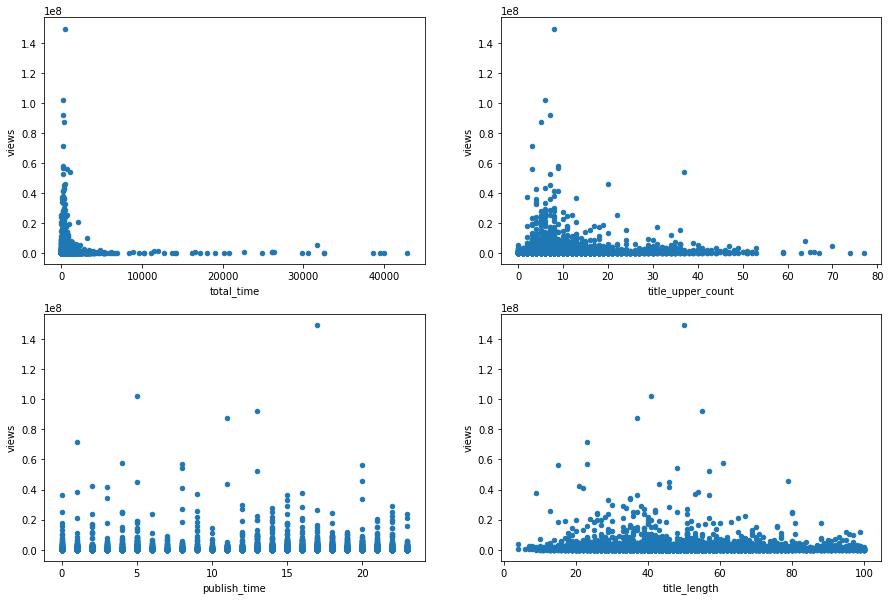

In [47]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize = (15,10))
df_features.plot.scatter(ax=axes[0,0], x='total_time', y='views')
df_features.plot.scatter(ax=axes[0,1], x='title_upper_count', y='views')
df_features.plot.scatter(ax=axes[1,0], x='publish_time', y='views')
df_features.plot.scatter(ax=axes[1,1], x='title_length', y='views')

Since total time graph seems heavily skewed due to outliers, we removed the top 1 percent of the longest or most viewed videos. 

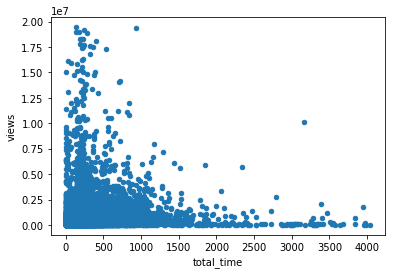

In [48]:
outlier_threshold = 0.01
cutoff = int(np.ceil(len(df_features['views'].values)*(1-outlier_threshold)))-1
views_removed_otlr = np.partition(df_features['views'].values, cutoff)
views_threshold = views_removed_otlr[cutoff]
cutoff = int(np.ceil(len(df_features['total_time'].values)*(1-outlier_threshold)))-1
time_removed_otlr = np.partition(df_features['total_time'].values, cutoff)
time_threshold = time_removed_otlr[cutoff]
df_temp = pd.DataFrame()
df_temp['views'] = df_features['views'].values
df_temp['total_time'] = df_features['total_time'].values
df_temp = df_temp[df_temp['views']<=views_threshold]
df_temp = df_temp[df_temp['total_time']<=time_threshold]
df_temp.plot.scatter(x='total_time', y='views')
